### Đọc dữ liệu

In [306]:
import pandas as pd
import matplotlib.pyplot as plt


In [307]:
data = pd.read_csv("stocks.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-02 00:00:00-05:00,64.778397,65.015923,63.852547,64.024628,94487200,0.0,0.0
1,2019-12-03 00:00:00-05:00,62.606747,62.902439,62.117161,62.883053,114430400,0.0,0.0
2,2019-12-04 00:00:00-05:00,63.275711,63.818619,63.181183,63.438095,67181600,0.0,0.0
3,2019-12-05 00:00:00-05:00,63.934952,64.443931,63.678039,64.368790,74424400,0.0,0.0
4,2019-12-06 00:00:00-05:00,64.829300,65.682442,64.785667,65.612152,106075600,0.0,0.0


In [308]:
# Kiểm tra dữ liệu
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,149.158424,150.813914,147.624139,149.301765,9.169537e+07,0.003595,0.003180
std,41.559620,41.764762,41.347922,41.580163,5.323647e+07,0.028374,0.112777
min,55.411093,55.513129,51.652720,54.509762,2.404830e+07,0.000000,0.000000
25%,124.906298,125.913650,123.553757,124.716047,5.641520e+07,0.000000,0.000000
50%,148.868846,150.724686,147.318862,149.173363,7.732030e+07,0.000000,0.000000
75%,175.410913,177.226681,173.954985,175.730236,1.089459e+08,0.000000,0.000000
max,235.947003,237.809998,234.192340,237.330002,4.265100e+08,0.250000,4.000000


In [309]:

# Clean and prepare the data
data['Date'] = pd.to_datetime(data['Date'],  errors='coerce')
data = data.dropna(subset=['Date'])
cleaned_data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12556\3257687780.py:2: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



### Biểu đồ Boxplot

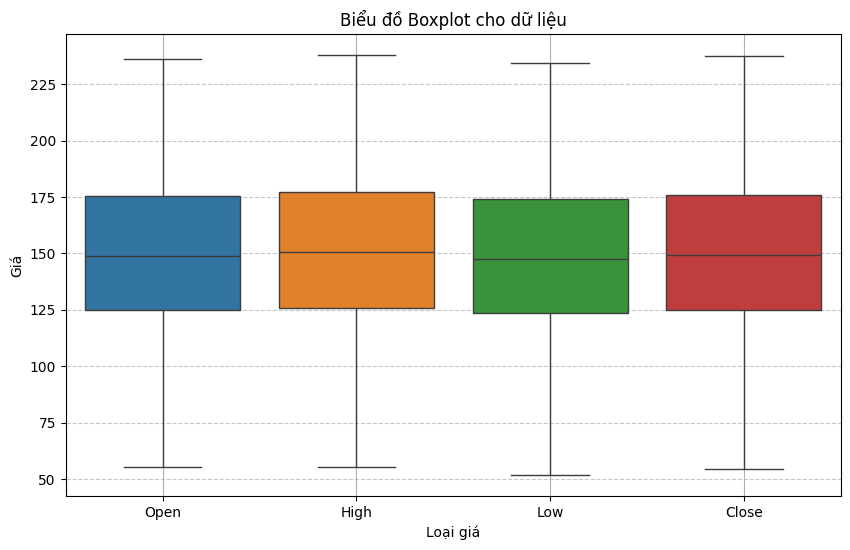

In [292]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data[['Open', 'High', 'Low', 'Close']])
plt.title('Biểu đồ Boxplot cho dữ liệu')
plt.ylabel('Giá')
plt.xlabel('Loại giá')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.show()

<h5> Biểu đồ cho thấy không có giá trị ngoại dư <h5>

### Xu hướng Giá Cổ phiếu Theo Thời Gian

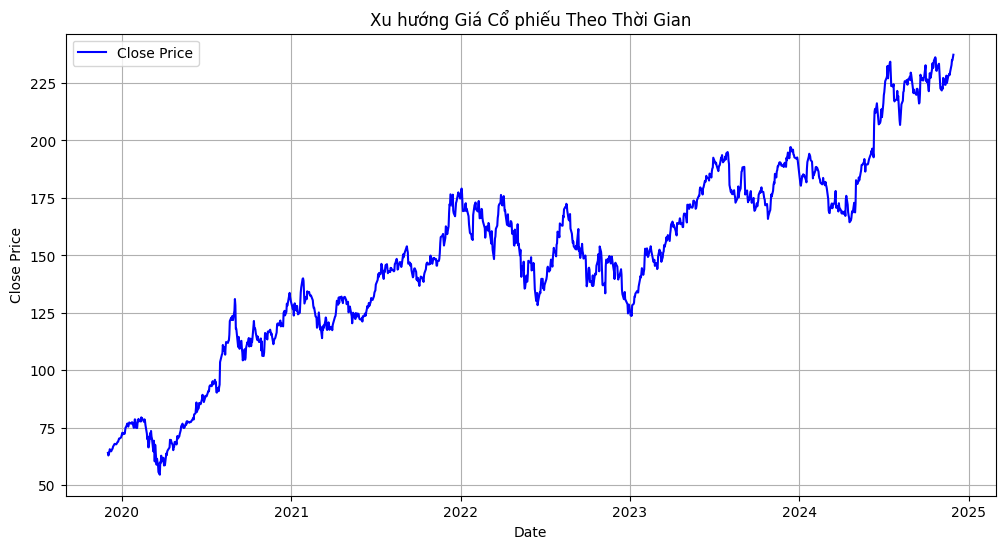

In [293]:

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Close Price', color='blue')
plt.title('Xu hướng Giá Cổ phiếu Theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

Xu hướng giá cổ phiếu (Close Price):

Có thể quan sát thấy xu hướng tăng dần với một số giai đoạn biến động mạnh, với đỉnh hiện nay đang là tháng 11/2024

### Biến động Khối lượng Giao dịch Theo Thời Gian

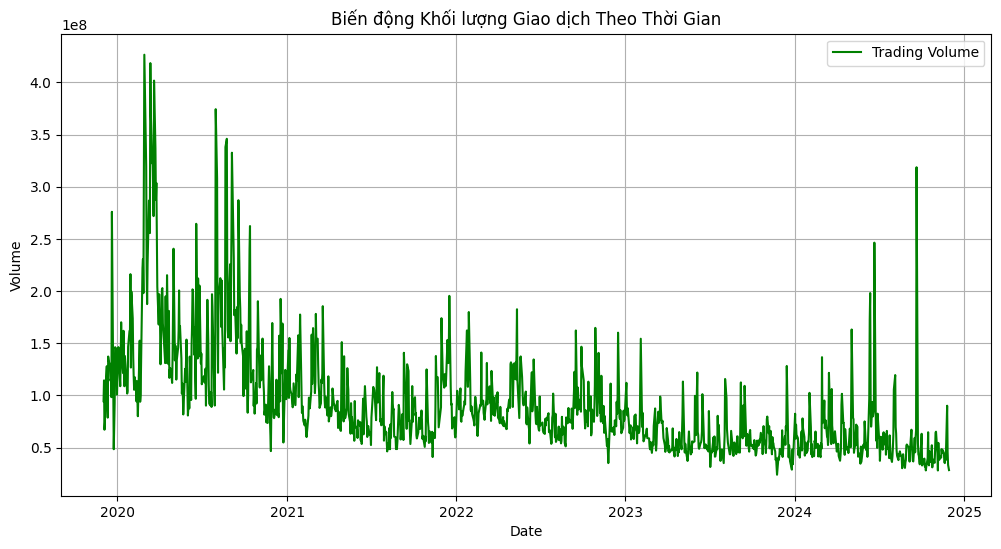

In [294]:
# Plot 2: Analyze trading volume fluctuations
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Volume'], label='Trading Volume', color='green')
plt.title('Biến động Khối lượng Giao dịch Theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

Khối lượng giao dịch (Volume):

Khối lượng giao dịch giảm dần sau giai đoạn đầu và có một số đợt tăng đột biến.

### Price Range theo thời gian

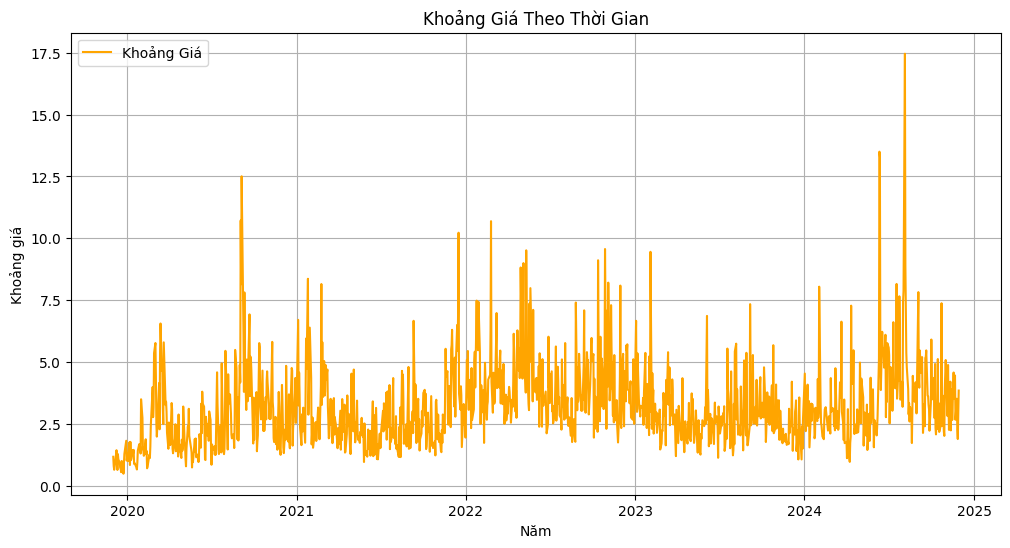

In [295]:
# Tính khoảng giá hàng ngày (Cao - Thấp)
cleaned_data['Price Range'] = cleaned_data['High'] - cleaned_data['Low']

# Vẽ biểu đồ: Phân tích khoảng giá hàng ngày theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Price Range'], label='Khoảng Giá', color='orange')
plt.title('Khoảng Giá Theo Thời Gian')
plt.xlabel('Năm')
plt.ylabel('Khoảng giá')
plt.legend()
plt.grid()
plt.show()


Biểu đồ trên thể hiện biến động giá hằng ngày (chênh lệch giữa giá cao nhất và giá thấp nhất) theo thời gian. Một số đặc điểm nổi bật:

Có một số giai đoạn biến động mạnh (Price Range cao), đặc biệt là vào các thời điểm bất thường (có thể do tin tức lớn hoặc sự kiện thị trường).
Biến động giá nhìn chung ổn định hơn trong các giai đoạn bình thường, nhưng vẫn có sự dao động đáng kể ở một số thời kỳ.

### Biểu đồ tương quan HeatMap

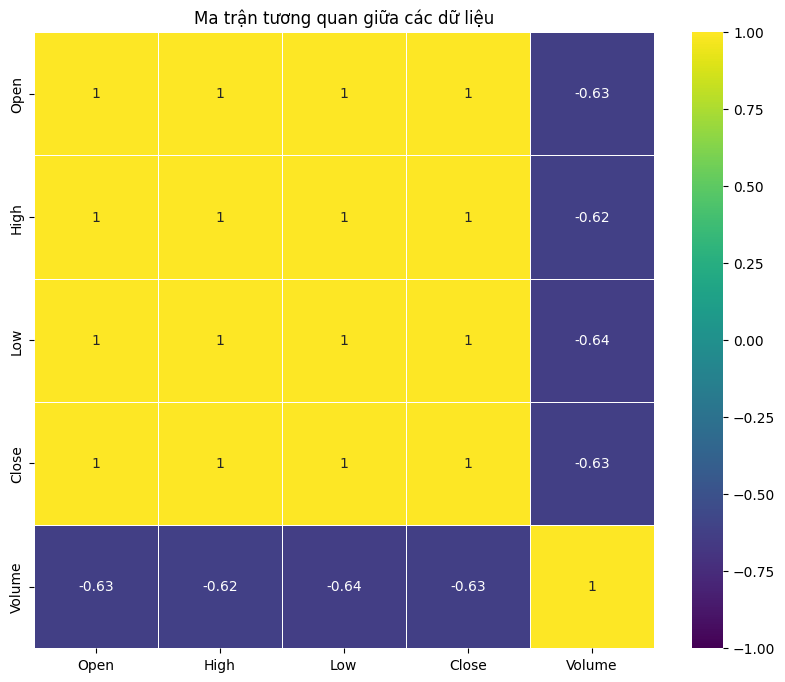

In [ ]:
import seaborn as sns

corr_matrix = cleaned_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các dữ liệu')
plt.show()

Từ biểu đồ, ta thấy khi giá mở cửa, cao nhất, thấp nhất hoặc đóng cửa tăng, khối lượng giao dịch có xu hướng giảm và ngược lại

### Biểu đồ phân tán (scatter plot), biểu diễn mối quan hệ giữa khối lượng giao dịch (Volume) và giá đóng cửa (Close).

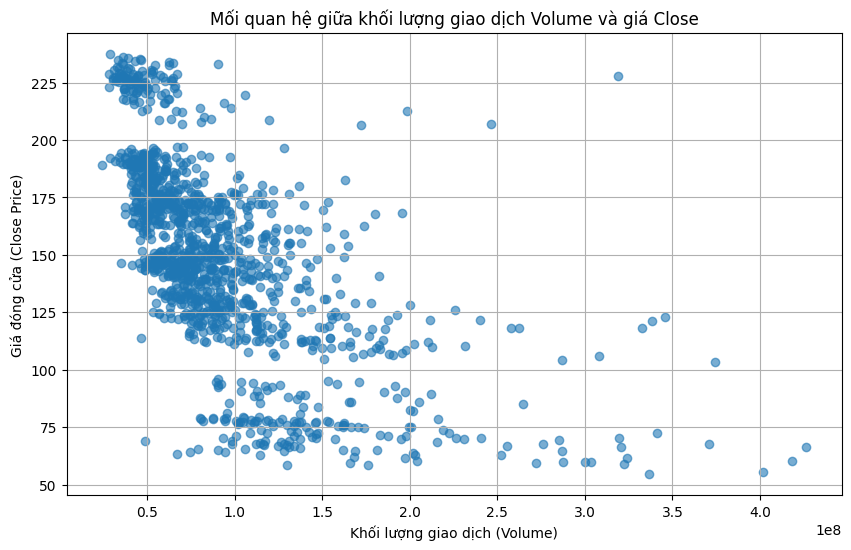

In [297]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Volume'], cleaned_data['Close'], alpha=0.6)
plt.title('Mối quan hệ giữa khối lượng giao dịch Volume và giá Close')
plt.xlabel('Khối lượng giao dịch (Volume)')
plt.ylabel('Giá đóng cửa (Close Price)')
plt.grid(True)
plt.show()

Biểu đồ cho thấy giá đóng cửa và khối lượng giao dịch tập trung nhiều ở những phiên đầu với giá cao cho tới trung bình

### Giá trị Open, High, Low, Close theo thời gian

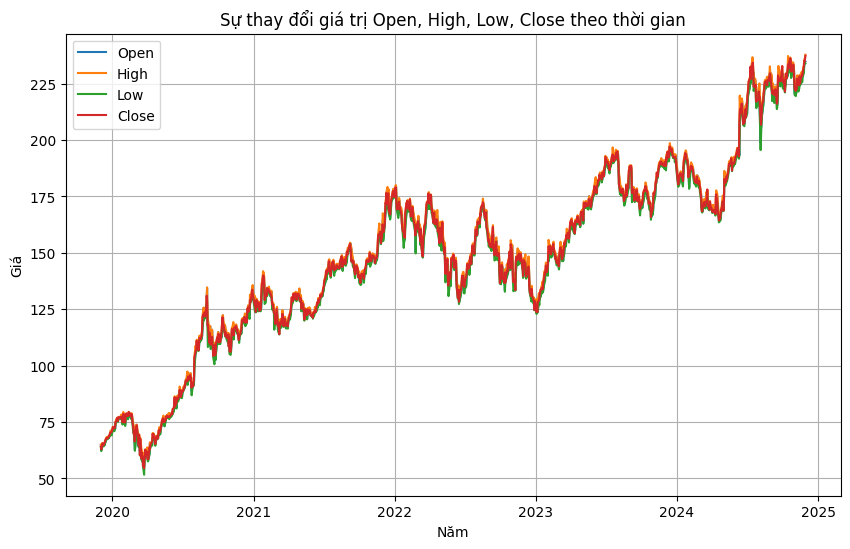

In [298]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Open'], label='Open')
plt.plot(cleaned_data['Date'], cleaned_data['High'], label='High')
plt.plot(cleaned_data['Date'], cleaned_data['Low'], label='Low')
plt.plot(cleaned_data['Date'], cleaned_data['Close'], label='Close')

# Tùy chỉnh trục X hiển thị theo năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Định dạng hiển thị năm
plt.gca().xaxis.set_major_locator(mdates.YearLocator())          # Đặt các mốc là từng năm
plt.title('Sự thay đổi giá trị Open, High, Low, Close theo thời gian')
plt.xlabel('Năm') 
plt.ylabel('Giá') 

# Các tùy chỉnh khác
plt.legend()
plt.grid(True)
plt.show()


### Biểu đồ Histogram phân phối của giá Close.


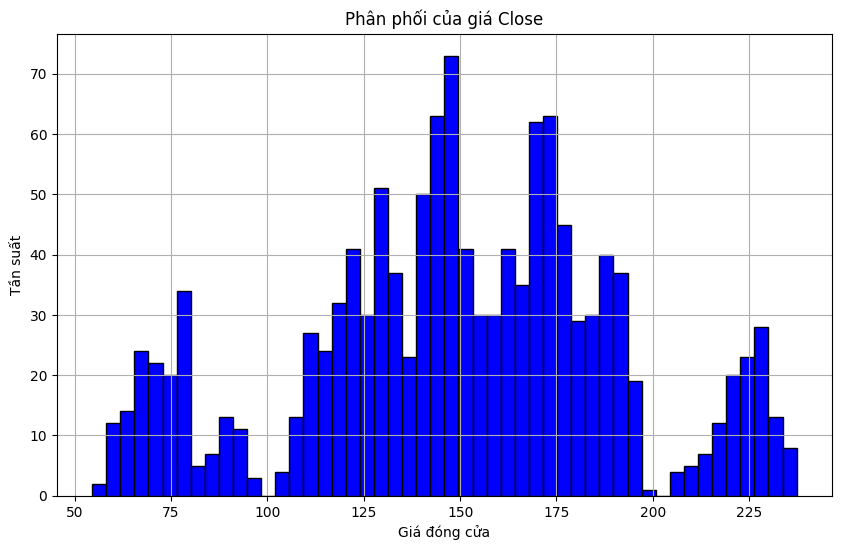

In [300]:
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['Close'], bins=50, color='blue', edgecolor='black')
plt.title('Phân phối của giá Close')
plt.xlabel('Giá đóng cửa')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()